# Diferential Equation Solver and Grapher on Sympy
### Instructions
- Change dot_x and dot_y for any function f(x,y) and g(x,y) you like
- For plotting, set the plot boundaries 
- For the trajectory, set the starting point and time 

In [23]:
# Bulk Imports and setup
from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt
import numpy as np

import sympy as sm
from sympy.utilities.lambdify import lambdify, implemented_function

import warnings
warnings.filterwarnings("ignore")

x, y, lamda = sm.symbols('x, y, lamda')

In [5]:
# Defining the equations via sympy
A=1
r=0.05
alpha = 0.5
delta = 0.15
sigma = 2

dot_x = A*(x**alpha)-y-delta*x  # f(x,y)
dot_y = (y/(sigma))*(alpha*A*x**(alpha-1)-r-delta)  # g(x,y)

display(Math('\\dot{x} = '+ sm.latex(dot_x)))
display(Math('\\dot{y} = '+ sm.latex(dot_y)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
### A matrix from dot(X)=AX (if system is linear)
# We contruct the vector <f(x,y), g(x,y)>.
A_vector = sm.Matrix([dot_x, dot_y])
# Jacobian for the A_vector. In a linear system this gives the A matrix from dot(X)=AX
A_matrix = A_vector.jacobian(([x, y]))
display(Math('\\mathbf{A} = '+ sm.latex(A_matrix)))

<IPython.core.display.Math object>

In [9]:
# Setting equations to zero and computing Fixed Points
dot_x_Equal, dot_y_Equal = sm.Eq(dot_x, 0), sm.Eq(dot_y, 0)
equilibria = sm.solve((dot_x_Equal, dot_y_Equal), x, y, dict=True)
for eq in equilibria:
    display(Math('Equilibrium Point: \\quad ('+sm.latex(eq[x])+', '+sm.latex(eq[y])+')'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
# Gives the value of the linear approximation for the Second Lyapunov Method
# And the characteristic Polinomial
for eq in equilibria:
    if sm.im(eq[x])==0 and sm.im(eq[y]) ==0: # Excludes imaginary equilibria
        matrix_subbed = A_matrix.subs(eq)
        display(Math("A\\Big|_{(" +sm.latex(eq[x]) + "," + sm.latex(eq[y])+ ")} = "+
                     sm.latex(matrix_subbed)))
        display(Math("p(\\lambda)\\Big|_{(" +sm.latex(eq[x]) + "," + sm.latex(eq[y])+ ")}="+
                     sm.latex(matrix_subbed.charpoly()))) 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
# Calculates eigenvals and eigenvects for each eq
# The list is of the form [{eq}, [eigenthing1, eigenthing1]]
# Each eigenthing is [(eigenval, multiplicity, [eigenvec]), …]
eigen_things = [[eq, A_matrix.subs(eq).eigenvects()]
              for eq in equilibria]
# Showing equilibrium and eigenthings
for _, eq in enumerate(equilibria):
    if sm.im(eq[x])==0 and sm.im(eq[y]) ==0: # Excludes imaginary equilibria
        display(Math("\\mathrm{Equilibrium}: (" + sm.latex(eq[x])+","+sm.latex(eq[y])+")"))
        # eigen_things[#eq][eigenthings][#pair][0=value, 1=mult, 2=eigenvect]
        for pair in eigen_things[_][1]:
                display(Math("\\mathrm{Eigenvalue}:"+ sm.latex(pair[0]) +
                             "\\quad \\mathrm{Multiplicity}=" + sm.latex(pair[1]) + "\\quad\\mathrm{Eigenvector}: "+ sm.latex(pair[2][0])))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

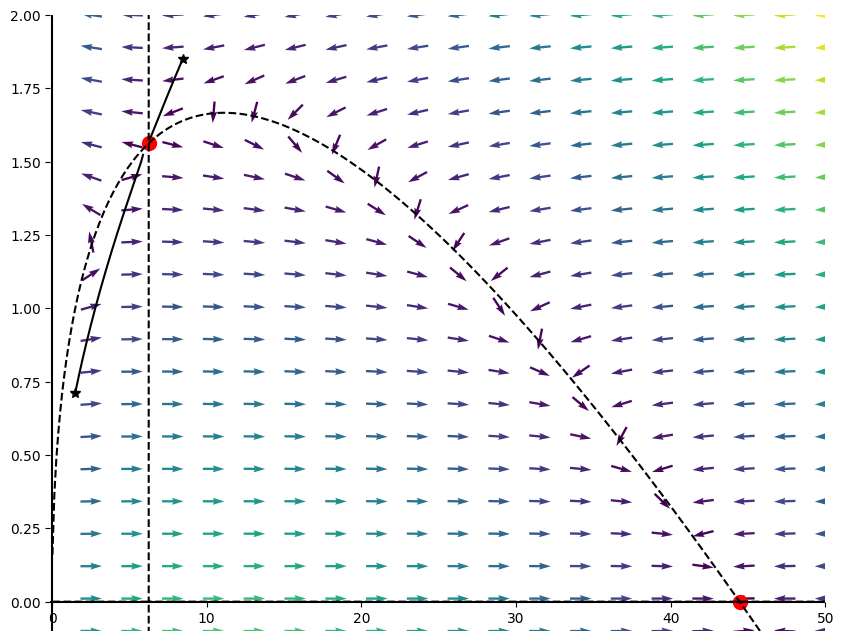

In [33]:
# Ploting  parameters
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
# ax.set_title("Sistema diferencial")

# Setting Plot Boundaries (needed of sympy)
x_min, y_min, x_max, y_max,  = -0.1, -0.1, 50, 2
# For plotting the trajectory
time, dt = 220, 0.15
initial_pairs = [(1.5, 0.7114), (8.45,1.85)] #List of the form [(x_0, y_0)]
# Choose if normalization of vectors is applied
normalize = True

#################################
# Plot fixed points
for point in equilibria:
    # Excludes complex equilibria
    if sm.im(point[x])==0 and sm.im(point[y]) == 0:
        ax.plot(point[x],point[y],"red", marker = "o", markersize = 10.0)

# To plot we translate from sympy to numpy
x_movement = lambdify((x, y), dot_x) 
y_movement = lambdify((x, y), dot_y)

# define a grid and compute direction at each point
x_line = np.linspace(x_min, x_max, 20)
y_line = np.linspace(y_min, y_max, 20)

# Plot initial point and trayectory
for pair in initial_pairs: 
    x_0 = pair[0]
    y_0 = pair[1]
    ax.plot(x_0, y_0, "black", marker = "*", markersize = 7.0)
    # Plot a singular trayectory
    x_list = [x_0]
    y_list = [y_0]
    for i in range(time):
        x_list.append(x_list[i] + (x_movement(x_list[i], y_list[i])) * dt)
        y_list.append(y_list[i] + (y_movement(x_list[i], y_list[i])) * dt)
    ax.plot(x_list, y_list, color="black")


# Quiverplot
# create a grid and set the dir vecs
X, Y = np.meshgrid(x_line, y_line)               
x_dir, y_dir = x_movement(X,Y), y_movement(X,Y)  
# prepare the colour and normalization factor
norm = np.sqrt(x_dir**2 + y_dir**2)

# Normalize
if normalize:
    x_dir /= norm
    y_dir /= norm

plt.quiver(X, Y, 
           x_dir, 
           y_dir,
           norm,
           pivot='mid')

# Manually integrate nullclines into the same axes
dot_x_contour = sm.lambdify((x, y), dot_x, "numpy")
dot_y_contour = sm.lambdify((x, y), dot_y, "numpy")

x_vals = np.linspace(x_min, x_max, 400)
y_vals = np.linspace(y_min, y_max, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z_x = dot_x_contour(X, Y)
Z_y = dot_y_contour(X, Y)

ax.contour(X, Y, Z_x, levels=[0], colors="black", linestyles="--")
ax.contour(X, Y, Z_y, levels=[0], colors="black", linestyles="--")

# Add X and Y axis
ax.axhline(0, color='black',ls='-')
ax.axvline(0, color='black',ls='-')
# remove outside spines
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(False)

# Position x labels above the axis line
ax.spines["bottom"].set_position("zero")

# have ticks on top of the axes
plt.show()

Note: if "Result too large error", just decrese the time 

# Credit Where Credit is due
- http://systems-sciences.uni-graz.at/etextbook/sw2/phpl_python.html
- https://stackoverflow.com/questions/60325325/putting-together-plots-of-matplotlib-and-sympy
- Dynamical Systems with Applications Using Python - Stephen Lynch (2018)